<a href="https://colab.research.google.com/github/smiledinisa/sk_learn/blob/master/sk_learn001_tree_ttnk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
# 导入需要的库。
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV #????什么作用？？？
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt


In [ ]:
# 导入数据集，预处理书籍。
data = pd.read_csv('/content/drive/My Drive/titannike/data.csv', index_col= 0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
# 可以看出，我们要预测生还，那么svrvived就是标签。 其他属性就是 特征。
data.info

<bound method DataFrame.info of              Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S
...               ...     ...  ...   ...      ...
887                 0       2  ...   NaN        S
888                 1       1  ...   B42        S
889                 0       3  ...   NaN        S
890                 1       1  ...  C148        C
891                 0       3  ...   NaN        Q

[891 rows x 11 columns]>

In [ ]:
# 删除那些打眼一看就没用的特征。name,cabin,ticket.以及空值较多的。
data.drop(['Ticket','Cabin','Name'], axis=1, inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
2,1,1,female,38.000000,1,0,71.2833,C
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S
888,1,1,female,19.000000,0,0,30.0000,S
889,0,3,female,29.699118,1,2,23.4500,S


In [ ]:
# 删除na的值。
data = data.dropna()
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
2,1,1,female,38.000000,1,0,71.2833,C
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S
888,1,1,female,19.000000,0,0,30.0000,S
889,0,3,female,29.699118,1,2,23.4500,S


In [ ]:
# 将字符特征转换为数字表示。 性别。

data['Sex'] = (data['Sex'] == 'mael').astype('int')

data['Sex']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


PassengerId
1      0
2      0
3      0
4      0
5      0
      ..
887    0
888    0
889    0
890    0
891    0
Name: Sex, Length: 889, dtype: int64

In [ ]:
# 将三分类量转换成数值变量。  Embarked
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x)) # 在labels中的索引。

data['Embarked']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


PassengerId
1      0
2      1
3      0
4      0
5      0
      ..
887    0
888    0
889    0
890    1
891    2
Name: Embarked, Length: 889, dtype: int64

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.000000,1,0,7.2500,0
2,1,1,0,38.000000,1,0,71.2833,1
3,1,3,0,26.000000,0,0,7.9250,0
4,1,1,0,35.000000,1,0,53.1000,0
5,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
887,0,2,0,27.000000,0,0,13.0000,0
888,1,1,0,19.000000,0,0,30.0000,0
889,0,3,0,29.699118,1,2,23.4500,0


In [ ]:
# 提取标签和特征矩阵，分测试机和训练集。
X = data.iloc[:,data.columns != 'Survived']
Y = data.iloc[:,data.columns == 'Survived']

from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size = 0.3)



In [ ]:
Xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
658,3,0,32.000000,1,1,15.5000,2
331,3,0,29.699118,2,0,23.2500,2
520,3,0,32.000000,0,0,7.8958,0
230,3,0,29.699118,3,1,25.4667,0
780,1,0,43.000000,0,1,211.3375,0
...,...,...,...,...,...,...,...
734,2,0,23.000000,0,0,13.0000,0
580,3,0,32.000000,0,0,7.9250,0
666,2,0,32.000000,2,0,73.5000,0


In [ ]:
# 修正索引

for i in [Xtrain,Xtest,Ytrain,Ytest]:
  i.index = range(i.shape[0])

Xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,32.000000,1,1,15.5000,2
1,3,0,29.699118,2,0,23.2500,2
2,3,0,32.000000,0,0,7.8958,0
3,3,0,29.699118,3,1,25.4667,0
4,1,0,43.000000,0,1,211.3375,0
...,...,...,...,...,...,...,...
617,2,0,23.000000,0,0,13.0000,0
618,3,0,32.000000,0,0,7.9250,0
619,2,0,32.000000,2,0,73.5000,0
620,3,0,29.699118,0,0,7.8958,0


In [ ]:
# 导入模型，查看以下结果，第一次基本上就是粗略的跑一下。

clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)

score_ = clf.score(Xtest,Ytest)

score_

0.6629213483146067

In [ ]:
# 用训练的模型交叉验证。
score = cross_val_score(clf, X,Y, cv=10).mean()
score

0.6536389172625128

0.7378277153558053


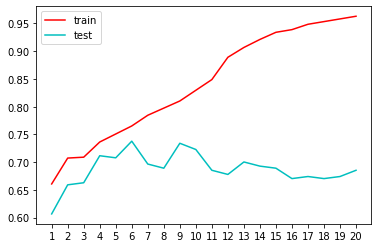

In [ ]:
# 在不同的max_depth 下观察模型的拟合情况。

tr = []
te = []

for i in range(20):
  clf = DecisionTreeClassifier(random_state=25, max_depth=i+1, criterion= 'entropy')
  clf = clf.fit(Xtrain,Ytrain)
  score_tr = clf.score(Xtrain,Ytrain)
  score_te = clf.score(Xtest, Ytest)
  tr.append(score_tr)
  te.append(score_te)

print(max(te))

# 画图。

plt.plot(range(1,21), tr, color='r', label = 'train')
plt.plot(range(1,21), te, color='c', label= 'test')
plt.xticks(range(1,21))
plt.legend()
plt.show()

In [ ]:
# 可以看出，这样我们每次只能确定一个最优参数，但是参数那么多，难道一个个的画图来确定吗？


# 用网格搜索确定参数。

import numpy as np

gini_thresholds = np.linspace(0,0.5,20) # 0-0.5 均分20份。
gini_thresholds

array([0.        , 0.02631579, 0.05263158, 0.07894737, 0.10526316,
       0.13157895, 0.15789474, 0.18421053, 0.21052632, 0.23684211,
       0.26315789, 0.28947368, 0.31578947, 0.34210526, 0.36842105,
       0.39473684, 0.42105263, 0.44736842, 0.47368421, 0.5       ])

In [ ]:
parameters = {
    'splitter':('best','random'),
    'criterion':('gini','entropy'),
    'max_depth':[(*range(1,10))],
    'min_samples_leaf':[*range(1,50,5)],
    'min_impurity_decrease':[*np.linspace(0,0.5,20)]




}


cfl = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)  #网格搜索，找出交叉验证分数最高的。
GS.fit(Xtrain, Ytrain)

GS.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'random'}

In [ ]:
GS.best_score_

0.7314388120839734

# 决策树优点
1. 易于理解和解释，因为树木可以画出来被看见
2. 需要很少的数据准备。其他很多算法通常都需要数据规范化，需要创建虚拟变量并删除空值等。但请注意，
sklearn中的决策树模块不支持对缺失值的处理。
3. 使用树的成本（比如说，在预测数据的时候）是用于训练树的数据点的数量的对数，相比于其他算法，这是
一个很低的成本。
4. 能够同时处理数字和分类数据，既可以做回归又可以做分类。其他技术通常专门用于分析仅具有一种变量类
型的数据集。
5. 能够处理多输出问题，即含有多个标签的问题，注意与一个标签中含有多种标签分类的问题区别开
6. 是一个白盒模型，结果很容易能够被解释。如果在模型中可以观察到给定的情况，则可以通过布尔逻辑轻松
解释条件。相反，在黑盒模型中（例如，在人工神经网络中），结果可能更难以解释。
7. 可以使用统计测试验证模型，这让我们可以考虑模型的可靠性。
8. 即使其假设在某种程度上违反了生成数据的真实模型，也能够表现良好。


# 决策树的缺点
1. 决策树学习者可能创建过于复杂的树，这些树不能很好地推广数据。这称为过度拟合。修剪，设置叶节点所
需的最小样本数或设置树的最大深度等机制是避免此问题所必需的，而这些参数的整合和调整对初学者来说
会比较晦涩
2. 决策树可能不稳定，数据中微小的变化可能导致生成完全不同的树，这个问题需要通过集成算法来解决。
3. 决策树的学习是基于贪婪算法，它靠优化局部最优（每个节点的最优）来试图达到整体的最优，但这种做法
不能保证返回全局最优决策树。这个问题也可以由集成算法来解决，在随机森林中，特征和样本会在分枝过
程中被随机采样。
4. 有些概念很难学习，因为决策树不容易表达它们，例如XOR，奇偶校验或多路复用器问题。
5. 如果标签中的某些类占主导地位，决策树学习者会创建偏向主导类的树。因此，建议在拟合决策树之前平衡
数据集。

In [ ]:
## 分类数在合成数据集上的表现。

# 导入库

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  #????标准化处理相关。
from sklearn.datasets import make_moons, make_circles, make_classification  # 三种数据，月亮型数据，环形数据，二分型数据。
from sklearn.tree import DecisionTreeClassifier



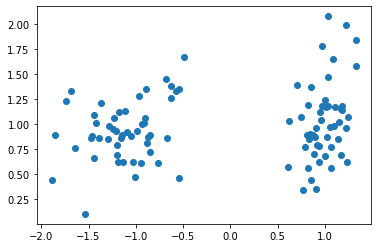

In [ ]:
x,y = make_classification(n_samples=100,
                          n_features=2,#特征数。
                          n_redundant=0,#冗余特征
                          n_informative=2,#包含信息的特征。
                          random_state=1,#随机状态。
                          n_clusters_per_class=1)#每个簇内一个标签。


plt.scatter(x[:,0],x[:,1])

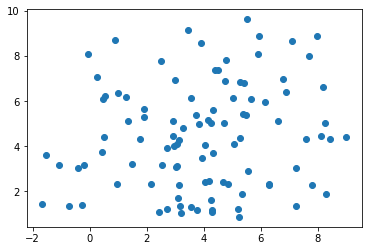

In [ ]:
rng = np.random.RandomState(2) #生成一种随机模式
x += 2 * rng.uniform(size=x.shape) #加减0~1之间的随机数
linearly_separable = (x, y) #生成了新的X，依然可以画散点图来观察一下特征的分布
plt.scatter(x[:,0],x[:,1])

In [ ]:
# #用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中

datasets = [make_moons(noise=0.3, random_state=0), make_circles(noise=0.2, factor=0.2, random_state=1), linearly_separable] #将三种数据放在一起组成一个list。


#3. 画出三种数据集和三棵决策树的分类效应图像

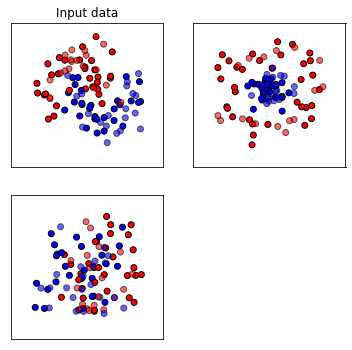

In [46]:
figure = plt.figure(figsize=(6,9))

i = 1

for ds_index, ds in enumerate(datasets):
  x,y = ds
  x = StandardScaler().fit_transform(x) #对x进行标准化。
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.4, random_state=42)

  # 找出数据的最大最小值，方便确定边界。
  x1_min,x1_max = x[:,0].min() - 1, x[:,0].max() +1
  x2_min,x2_max = x[:,1].min()-1, x[:,0].max() +1

#   ##用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点
#   #函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长
#   #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。
#   #如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。那么生成的第一个二维数组是以
#   # narray为行，m行的矩阵，而第二个二维数组是以marray的转置为列，n列的矩阵
#   #生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二
#   # 维的

  array1,array2 = np.meshgrid(np.arange(x1_min,x1_max,0.2), np.arange(x2_min,x2_max,0.2))
  
#接下来生成彩色画布
#用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  
#在画布上加上一个子图，数据len(datasets)行，2列。放在位置i上。
  ax = plt.subplot(len(datasets),2,i) # i的初始值等于1

#到这里为止，已经生成了0~1之间的坐标系3个了，接下来为我们的坐标系放上标题
#我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
  if ds_index ==0: #第一个图标上加上标题。
    ax.set_title('Input data')
# 画上数据集的散点图。
  ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cm_bright, edgecolor='k')  #注意颜色就是标签y的值。

#测试集合。
  ax.scatter(x_test[:,0], x_test[:,1], c= y_test, cmap=cm_bright, edgecolor='k', alpha=0.6)

#为图设置坐标轴的最大值和最小值，并设定没有坐标轴。
  ax.set_xlim(array1.min(), array1.max())
  ax.set_ylim(array2.min(), array2.max())
  ax.set_xticks(())
  ax.set_yticks(())
  
  i += 1
  

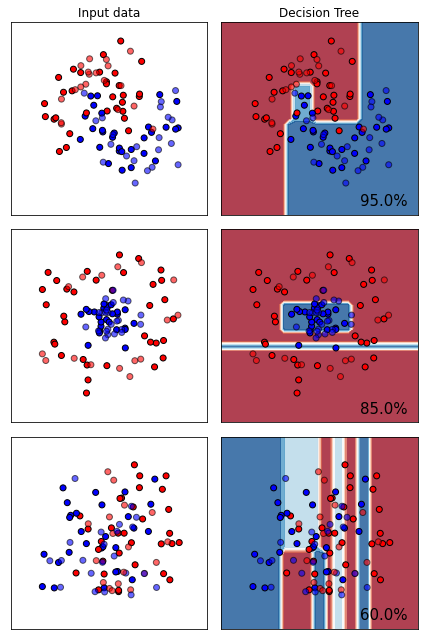

In [49]:
figure = plt.figure(figsize=(6,9))

i = 1

for ds_index, ds in enumerate(datasets):
  x,y = ds
  x = StandardScaler().fit_transform(x) #对x进行标准化。
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.4, random_state=42)

  # 找出数据的最大最小值，方便确定边界。
  x1_min,x1_max = x[:,0].min() - 1, x[:,0].max() +1
  x2_min,x2_max = x[:,1].min()-1, x[:,0].max() +1

#   ##用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点
#   #函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长
#   #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。
#   #如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。那么生成的第一个二维数组是以
#   # narray为行，m行的矩阵，而第二个二维数组是以marray的转置为列，n列的矩阵
#   #生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二
#   # 维的

  array1,array2 = np.meshgrid(np.arange(x1_min,x1_max,0.2), np.arange(x2_min,x2_max,0.2))
  
#接下来生成彩色画布
#用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  
#在画布上加上一个子图，数据len(datasets)行，2列。放在位置i上。
  ax = plt.subplot(len(datasets),2,i) # i的初始值等于1

#到这里为止，已经生成了0~1之间的坐标系3个了，接下来为我们的坐标系放上标题
#我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
  if ds_index ==0: #第一个图标上加上标题。
    ax.set_title('Input data')
# 画上数据集的散点图。
  ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cm_bright, edgecolor='k')  #注意颜色就是标签y的值。

#测试集合。
  ax.scatter(x_test[:,0], x_test[:,1], c= y_test, cmap=cm_bright, edgecolor='k', alpha=0.6)

#为图设置坐标轴的最大值和最小值，并设定没有坐标轴。
  ax.set_xlim(array1.min(), array1.max())
  ax.set_ylim(array2.min(), array2.max())
  ax.set_xticks(())
  ax.set_yticks(())
  
  i += 1




#至此为止，数据集本身的图像已经布置完毕，运行以上的代码，可以看见三个已经处理好的数据集 
#   #############################从这里开始是决策树模型##########################
#  
#   #迭代决策树，首先用subplot增加子图，subplot(行，列，索引)这样的结构，并使用索引i定义图的位置
#   #在这里，len(datasets)其实就是3，2是两列
#   #在函数最开始，我们定义了i=1，并且在上边建立数据集的图像的时候，已经让i+1,所以i在每次循环中的取值
# 是2，4，6

  ax = plt.subplot(len(datasets),2,i) # 注意之前i已经增加了一。

#决策树的建模：实例化，fit,score 预测准确率
  clf = DecisionTreeClassifier(max_depth=5)
  clf = clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)

#绘制决策边界，为此，我们将为网格中的每个点指定一种颜色[x1_min，x1_max] x [x2_min，x2_max]
#分类树的接口，predict_proba，返回每一个输入的数据点所对应的标签类概率
#类概率是数据点所在的叶节点中相同类的样本数量/叶节点中的样本总数量
#由于决策树在训练的时候导入的训练集X_train里面包含两个特征，所以我们在计算类概率的时候，也必须导入
#结构相同的数组，即是说，必须有两个特征
#ravel()能够将一个多维数组转换成一维数组
#np.c_是能够将两个数组组合起来的函数
#在这里，我们先将两个网格数据降维降维成一维数组，再将两个数组链接变成含有两个特征的数据，再带入决策
# 树模型，生成的Z包含数据的索引和每个样本点对应的类概率，再切片，切出类概率

  z = clf.predict_proba(np.c_[array1.ravel(), array2.ravel()])[:,1]
# 先都降低成一维度，然后对应的组合起来，然后输入预测，结果再转换成二维。
# 下标就是对应的坐标点，值就是颜色。

# 将z作为数据，放到contourf 里面绘制轮廓。
  z = z.reshape(array1.shape)

  ax.contourf(array1,array2, z, cmap=cm, alpha=0.8)


 # 将数据集的分布放到我们的坐标系上。
 # 将数据集放到图上。
  ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cm_bright, edgecolors='k')
  ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)  # 注意这里画，是因为跟之前画的并不在一幅图上。

# 为图像设置坐标最大最小值。
  ax.set_xlim(array1.min(), array1.max())
  ax.set_ylim(array2.min(), array2.max())
  ax.set_xticks(())
  ax.set_yticks(())


  if ds_index ==0:
    ax.set_title('Decision Tree')

  ax.text(array1.max() - .3, array2.min()+0.3,('{:.1f}%'.format(score*100)),size=15, horizontalalignment = 'right')  # 前两个参数为坐标，坐标后边跟的文本，大小，对齐方式。

  i +=1

plt.tight_layout()
plt.show()

In [47]:
np.c_[np.array([1,2,3]), np.array([3,4,5])]

array([[1, 3],
       [2, 4],
       [3, 5]])

In [50]:
ax.scatter?